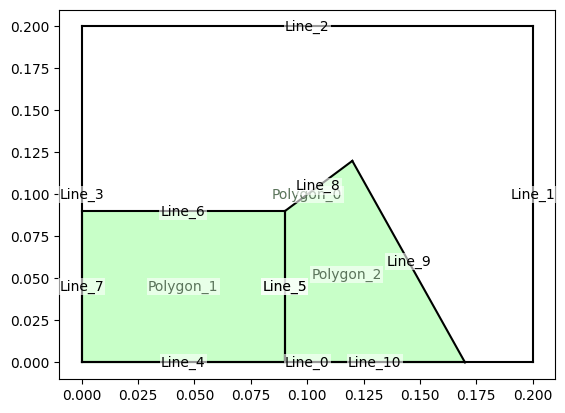

In [1]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.09,0),geo.Vector(0.09,0.09), geo.Vector(0,0.09)]),
                               geo.Polygon([geo.Vector(0.09, 0), geo.Vector(0.09,0.09),geo.Vector(0.12,0.12), geo.Vector(0.17,0)])])
a.assemble()
fig,ax = plt.subplots()
a.plot(ax, labels=True)
plt.show()

In [2]:
bcdict = {"Line_3" : 5,"Line_1" : 5,"Line_0" : 5,"Line_2" : 5,"Line_10" : 5,}
print(set(bcdict.keys()).issubset(a.getLineNames()))
c = ph.Couette(a, bcdict)



True
